### Describing the Data Fields in the Data Set
1.	url -	URL string - str
2.	source - Source of the URL (phishing URLs or URL ranking databases) - str
3.	label - Category of URL, either phishing or legitimate - str
4.	url_length - URL length in characters - int
5.	starts_with_ip - Is the base URL an IP address? - bool
6.	url_entropy - URL/hostname entropy - float
7.	has_punycode - Does the URL contain at least one punycode character? - bool
8.	digit_letter_ratio - Digit-letter character ratio in URL - float
9.	dot_count - Count of occurrences of dot (.) inside URL - int
10.	at_count - 	Count of occurrences of dot (@) inside URL - int
11.	dash_count - Count of occurrences of dot (-) inside URL - int
12.	tld_count -	Does the subdirectory in the URL contain top-level domains? - int
13.	domain_has_digits - Does the domain (base URL) contain digits? - bool
14.	subdomain_count- Count of subdomains featured in the base URL - int
15.	nan_char_entropy - Character entropy of non-alphanumeric characters inside the URL - float
16.	has_internal_links - Does the URL subdirectory contain links? - bool
17.	whois_data - Domain WHOIS record - bool
18.	domain_age_days - Domain age in days, according to extracted WHOIS record - float

In [ ]:
# Import Data Handling Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Cross Validation Libraries from Scikit Learn
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

# Import Scaling Libraries and Scaling Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import Sampling Model for Undersampling
from imblearn.under_sampling import RandomUnderSampler

# Import Evalution Metrices from Scikit Learn
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)

#Import for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the data from .csv file and save in pada dataframe
df = pd. read_csv('/content/drive/MyDrive/ML/out.csv')
# Displaying the data converted in to dataframe
df

,url,source,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,whois_data,domain_age_days
0,apaceast.cloudguest.central.arubanetworks.com,Cisco-Umbrella,legitimate,45,False,3.924535,False,0.000000,4,0,0,0,False,3,0.310387,False,"{'domain_name': ['ARUBANETWORKS.COM', 'arubane...",8250.0
1,quintadonoval.com,Majestic,legitimate,17,False,3.572469,False,0.000000,1,0,0,0,False,0,0.240439,False,"{'domain_name': ['QUINTADONOVAL.COM', 'quintad...",10106.0
2,nomadfactory.com,Majestic,legitimate,16,False,3.327820,False,0.000000,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['NOMADFACTORY.COM', 'nomadfac...",8111.0
3,tvarenasport.com,Majestic,legitimate,16,False,3.500000,False,0.000000,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['TVARENASPORT.COM', 'tvarenas...",5542.0
4,widget.cluster.groovehq.com,Cisco-Umbrella,legitimate,27,False,3.930270,False,0.000000,3,0,0,0,False,2,0.352214,False,"{'domain_name': 'GROOVEHQ.COM', 'registrar': '...",5098.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499995,http://atualizacao.novoatendimentocaixa.ml/sinbc,Phishing.Database,phishing,48,False,4.068902,False,0.000000,2,0,0,0,False,1,0.557393,False,"{'domain_name': 'novoatend', 'registrar': None...",NaN
2499996,https://ingcomptebe-1cd7e.firebaseapp.com,Phishing.Database,phishing,41,False,4.257078,False,0.060606,2,0,1,0,False,1,0.555799,False,NaN,NaN
2499997,http://yonphweisdowedych.chaseonlinemarketing....,Phishing.Database,phishing,66,False,4.393366,False,0.000000,2,0,0,0,False,1,0.581139,False,NaN,NaN
2499998,http://alternateangle.in/~pugepupgee/.wkwk/lkd...,Phishing.Database,phishing,102,False,4.763413,False,0.194444,3,0,0,0,False,0,0.787769,False,"{'domain_name': 'alternateangle.in', 'registra...",4622.0


In [ ]:
# Identify the shape of the data set
df.shape

(2500000, 18)

In [ ]:
# Identify the first few data of the data set
df.head(5)

,url,source,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,whois_data,domain_age_days
0,apaceast.cloudguest.central.arubanetworks.com,Cisco-Umbrella,legitimate,45,False,3.924535,False,0.0,4,0,0,0,False,3,0.310387,False,"{'domain_name': ['ARUBANETWORKS.COM', 'arubane...",8250.0
1,quintadonoval.com,Majestic,legitimate,17,False,3.572469,False,0.0,1,0,0,0,False,0,0.240439,False,"{'domain_name': ['QUINTADONOVAL.COM', 'quintad...",10106.0
2,nomadfactory.com,Majestic,legitimate,16,False,3.327820,False,0.0,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['NOMADFACTORY.COM', 'nomadfac...",8111.0
3,tvarenasport.com,Majestic,legitimate,16,False,3.500000,False,0.0,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['TVARENASPORT.COM', 'tvarenas...",5542.0
4,widget.cluster.groovehq.com,Cisco-Umbrella,legitimate,27,False,3.930270,False,0.0,3,0,0,0,False,2,0.352214,False,"{'domain_name': 'GROOVEHQ.COM', 'registrar': '...",5098.0


In [ ]:
# Identify the last few data of the data set
df.tail(5)

,url,source,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,whois_data,domain_age_days
2499995,http://atualizacao.novoatendimentocaixa.ml/sinbc,Phishing.Database,phishing,48,False,4.068902,False,0.000000,2,0,0,0,False,1,0.557393,False,"{'domain_name': 'novoatend', 'registrar': None...",NaN
2499996,https://ingcomptebe-1cd7e.firebaseapp.com,Phishing.Database,phishing,41,False,4.257078,False,0.060606,2,0,1,0,False,1,0.555799,False,NaN,NaN
2499997,http://yonphweisdowedych.chaseonlinemarketing....,Phishing.Database,phishing,66,False,4.393366,False,0.000000,2,0,0,0,False,1,0.581139,False,NaN,NaN
2499998,http://alternateangle.in/~pugepupgee/.wkwk/lkd...,Phishing.Database,phishing,102,False,4.763413,False,0.194444,3,0,0,0,False,0,0.787769,False,"{'domain_name': 'alternateangle.in', 'registra...",4622.0
2499999,https://verifyacoount5375.duckdns.org/invalid....,Phishing.Database,phishing,50,False,4.553270,False,0.102564,3,0,0,0,False,1,0.599944,False,"{'domain_name': None, 'registrar': None, 'whoi...",NaN


In [ ]:
# Identify the result distribution
df['label'].value_counts()

,count
label,
legitimate,1250000
phishing,1250000


Balance data set

In [ ]:
# Identify the data type and not null count in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   url                 object 
 1   source              object 
 2   label               object 
 3   url_length          int64  
 4   starts_with_ip      bool   
 5   url_entropy         float64
 6   has_punycode        bool   
 7   digit_letter_ratio  float64
 8   dot_count           int64  
 9   at_count            int64  
 10  dash_count          int64  
 11  tld_count           int64  
 12  domain_has_digits   bool   
 13  subdomain_count     int64  
 14  nan_char_entropy    float64
 15  has_internal_links  bool   
 16  whois_data          object 
 17  domain_age_days     float64
dtypes: bool(4), float64(4), int64(6), object(4)
memory usage: 276.6+ MB


In [ ]:
# Identify the statistical data in the data set
df.describe()

,url_length,url_entropy,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,subdomain_count,nan_char_entropy,domain_age_days
count,2.500000e+06,2.500000e+06,2.499999e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,1.749311e+06
mean,4.588017e+01,3.907981e+00,1.168567e-01,2.174582e+00,1.141840e-02,7.410540e-01,3.923280e-02,7.777008e-01,4.651602e-01,4.863090e+03
std,7.439959e+01,6.357209e-01,2.451448e-01,1.736380e+00,1.407410e-01,1.662709e+00,3.905095e-01,1.103257e+00,1.880023e-01,3.345879e+03
min,4.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.600000e+01
25%,1.700000e+01,3.452820e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.063967e-01,2.009000e+03
50%,2.900000e+01,3.911860e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.154523e-01,4.281000e+03
75%,5.200000e+01,4.329283e+00,1.333333e-01,3.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,6.184690e-01,7.740000e+03
max,2.552300e+04,6.048781e+00,2.084000e+01,2.110000e+02,3.200000e+01,3.220000e+02,6.500000e+01,4.300000e+01,1.901504e+00,4.554100e+04


In [ ]:
# Identify the null count in the data set
df.isnull().sum()

,0
url,1
source,0
label,0
url_length,0
starts_with_ip,0
url_entropy,0
has_punycode,0
digit_letter_ratio,1
dot_count,0
at_count,0


In [ ]:
# Removing the null data containing the rows
df = df.dropna()
df

,url,source,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,whois_data,domain_age_days
0,apaceast.cloudguest.central.arubanetworks.com,Cisco-Umbrella,legitimate,45,False,3.924535,False,0.000000,4,0,0,0,False,3,0.310387,False,"{'domain_name': ['ARUBANETWORKS.COM', 'arubane...",8250.0
1,quintadonoval.com,Majestic,legitimate,17,False,3.572469,False,0.000000,1,0,0,0,False,0,0.240439,False,"{'domain_name': ['QUINTADONOVAL.COM', 'quintad...",10106.0
2,nomadfactory.com,Majestic,legitimate,16,False,3.327820,False,0.000000,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['NOMADFACTORY.COM', 'nomadfac...",8111.0
3,tvarenasport.com,Majestic,legitimate,16,False,3.500000,False,0.000000,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['TVARENASPORT.COM', 'tvarenas...",5542.0
4,widget.cluster.groovehq.com,Cisco-Umbrella,legitimate,27,False,3.930270,False,0.000000,3,0,0,0,False,2,0.352214,False,"{'domain_name': 'GROOVEHQ.COM', 'registrar': '...",5098.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499990,http://mygovau-997cef.ingress-earth.ewp.live/m...,Phishing.Database,phishing,56,False,4.532639,False,0.069767,3,0,2,0,False,2,0.601856,False,"{'domain_name': 'ewp.live', 'registrar': 'NAME...",836.0
2499992,https://rtsfg.000webhostapp.com,Phishing.Database,phishing,31,False,3.977917,False,0.130435,2,0,0,0,True,1,0.670032,False,"{'domain_name': '000WEBHOSTAPP.COM', 'registra...",3042.0
2499993,http://messagerie-orange404.yolasite.com,Phishing.Database,phishing,40,False,4.206198,False,0.096774,2,0,1,0,False,1,0.565241,False,"{'domain_name': 'YOLASITE.COM', 'registrar': '...",5999.0
2499994,https://244.33.109.208.host.secureserver.net/b...,Phishing.Database,phishing,116,False,4.785843,False,0.485294,7,0,1,0,False,5,0.524573,False,"{'domain_name': 'SECURESERVER.NET', 'registrar...",9659.0


In [ ]:
# Check the null co
df.isnull().sum()

,0
url,0
source,0
label,0
url_length,0
starts_with_ip,0
url_entropy,0
has_punycode,0
digit_letter_ratio,0
dot_count,0
at_count,0


In [ ]:
# Check the result distribution after removing the null values
df['label'].value_counts()

,count
label,
legitimate,1096403
phishing,652908


In [ ]:
# Display result distribution as percentages
df['label'].value_counts(normalize=True) * 100

,proportion
label,
legitimate,62.676277
phishing,37.323723


Data set has been oversampled after handling null values.

In [ ]:
# Remove url and whois columns
df = df.drop(['url', 'whois_data','source', 'domain_age_days'], axis=1)
df

,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links
0,legitimate,45,False,3.924535,False,0.000000,4,0,0,0,False,3,0.310387,False
1,legitimate,17,False,3.572469,False,0.000000,1,0,0,0,False,0,0.240439,False
2,legitimate,16,False,3.327820,False,0.000000,1,0,0,0,False,0,0.250000,False
3,legitimate,16,False,3.500000,False,0.000000,1,0,0,0,False,0,0.250000,False
4,legitimate,27,False,3.930270,False,0.000000,3,0,0,0,False,2,0.352214,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499990,phishing,56,False,4.532639,False,0.069767,3,0,2,0,False,2,0.601856,False
2499992,phishing,31,False,3.977917,False,0.130435,2,0,0,0,True,1,0.670032,False
2499993,phishing,40,False,4.206198,False,0.096774,2,0,1,0,False,1,0.565241,False
2499994,phishing,116,False,4.785843,False,0.485294,7,0,1,0,False,5,0.524573,False


In [ ]:
columns_to_be_numerized = df[['label']]

df_dummies = pd.get_dummies(columns_to_be_numerized).astype(int)
df_dummies

,label_legitimate,label_phishing
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
2499990,0,1
2499992,0,1
2499993,0,1
2499994,0,1


In [ ]:
# Drop the irrelvant columns from df_dummies
df_dummies = df_dummies.drop(['label_legitimate'], axis=1)
df_dummies

,label_phishing
0,0
1,0
2,0
3,0
4,0
...,...
2499990,1
2499992,1
2499993,1
2499994,1


In [ ]:
df_dummies = df_dummies.rename(columns={'label_phishing': 'is_phishing_url'})
df_dummies

,is_phishing_url
0,0
1,0
2,0
3,0
4,0
...,...
2499990,1
2499992,1
2499993,1
2499994,1


In [ ]:
# Remove label and source form dataframe
df = df.drop(['label'], axis=1)
df

,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links
0,45,False,3.924535,False,0.000000,4,0,0,0,False,3,0.310387,False
1,17,False,3.572469,False,0.000000,1,0,0,0,False,0,0.240439,False
2,16,False,3.327820,False,0.000000,1,0,0,0,False,0,0.250000,False
3,16,False,3.500000,False,0.000000,1,0,0,0,False,0,0.250000,False
4,27,False,3.930270,False,0.000000,3,0,0,0,False,2,0.352214,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499990,56,False,4.532639,False,0.069767,3,0,2,0,False,2,0.601856,False
2499992,31,False,3.977917,False,0.130435,2,0,0,0,True,1,0.670032,False
2499993,40,False,4.206198,False,0.096774,2,0,1,0,False,1,0.565241,False
2499994,116,False,4.785843,False,0.485294,7,0,1,0,False,5,0.524573,False


In [ ]:
# Concatenate two data frames
df = pd.concat([df, df_dummies], axis=1)
df

,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,is_phishing_url
0,45,False,3.924535,False,0.000000,4,0,0,0,False,3,0.310387,False,0
1,17,False,3.572469,False,0.000000,1,0,0,0,False,0,0.240439,False,0
2,16,False,3.327820,False,0.000000,1,0,0,0,False,0,0.250000,False,0
3,16,False,3.500000,False,0.000000,1,0,0,0,False,0,0.250000,False,0
4,27,False,3.930270,False,0.000000,3,0,0,0,False,2,0.352214,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499990,56,False,4.532639,False,0.069767,3,0,2,0,False,2,0.601856,False,1
2499992,31,False,3.977917,False,0.130435,2,0,0,0,True,1,0.670032,False,1
2499993,40,False,4.206198,False,0.096774,2,0,1,0,False,1,0.565241,False,1
2499994,116,False,4.785843,False,0.485294,7,0,1,0,False,5,0.524573,False,1


In [ ]:
# Change bool values into int
def change_bool_to_int(df, columns):
    # Iterate over the list of columns and convert values
    for column in columns:
        df[column] = df[column].astype(int)
    return df

In [ ]:
df = change_bool_to_int(df, ['starts_with_ip', 'has_punycode', 'domain_has_digits', 'has_internal_links'])
df

,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,is_phishing_url
0,45,0,3.924535,0,0.000000,4,0,0,0,0,3,0.310387,0,0
1,17,0,3.572469,0,0.000000,1,0,0,0,0,0,0.240439,0,0
2,16,0,3.327820,0,0.000000,1,0,0,0,0,0,0.250000,0,0
3,16,0,3.500000,0,0.000000,1,0,0,0,0,0,0.250000,0,0
4,27,0,3.930270,0,0.000000,3,0,0,0,0,2,0.352214,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499990,56,0,4.532639,0,0.069767,3,0,2,0,0,2,0.601856,0,1
2499992,31,0,3.977917,0,0.130435,2,0,0,0,1,1,0.670032,0,1
2499993,40,0,4.206198,0,0.096774,2,0,1,0,0,1,0.565241,0,1
2499994,116,0,4.785843,0,0.485294,7,0,1,0,0,5,0.524573,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1749311 entries, 0 to 2499998
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   url_length          int64  
 1   starts_with_ip      int64  
 2   url_entropy         float64
 3   has_punycode        int64  
 4   digit_letter_ratio  float64
 5   dot_count           int64  
 6   at_count            int64  
 7   dash_count          int64  
 8   tld_count           int64  
 9   domain_has_digits   int64  
 10  subdomain_count     int64  
 11  nan_char_entropy    float64
 12  has_internal_links  int64  
 13  is_phishing_url     int64  
dtypes: float64(3), int64(11)
memory usage: 200.2 MB


In [ ]:
from re import X
# Define X and y
X = df.drop('is_phishing_url', axis=1)
y = df['is_phishing_url']

In [ ]:
# define train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(1224517, 13)

In [ ]:
X_test.shape

(524794, 13)

In [ ]:
# using SMOTE sampling to rearange train data
rus = RandomUnderSampler(random_state=42)  # You can set a random state for reproducibility
X_train_resampled, y_train_resampled = rus.fit_resample(X, y)

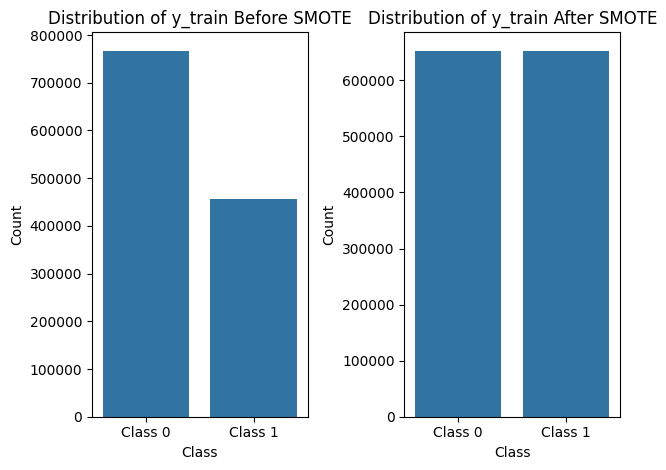

In [ ]:
# Before SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Distribution of y_train Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])

# After SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled)
plt.title('Distribution of y_train After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])

plt.tight_layout()
plt.show()

In [ ]:
# define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest

model.fit(X_train_resampled, y_train_resampled)

y_pred_before_tuning = model.predict(X_test)

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
 [[329071      1]
 [     0 195722]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    329072
           1       1.00      1.00      1.00    195722

    accuracy                           1.00    524794
   macro avg       1.00      1.00      1.00    524794
weighted avg       1.00      1.00      1.00    524794

ROC AUC: 1.00


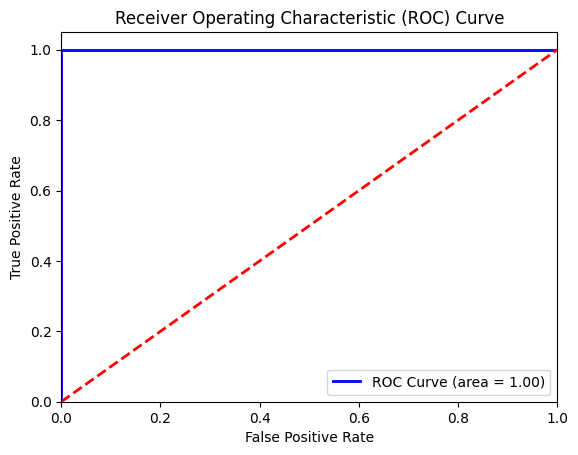

In [ ]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_before_tuning)
precision = precision_score(y_test, y_pred_before_tuning, average='binary')  # Change 'binary' to 'macro' for multi-class
recall = recall_score(y_test, y_pred_before_tuning, average='binary')  # Change 'binary' to 'macro' for multi-class
f1 = f1_score(y_test, y_pred_before_tuning, average='binary')  # Change 'binary' to 'macro' for multi-class
conf_matrix = confusion_matrix(y_test, y_pred_before_tuning)
class_report = classification_report(y_test, y_pred_before_tuning)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Display results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)
print(f'ROC AUC: {roc_auc:.2f}')

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import pickle

# Save the model to a file
with open('phishing_url_detection_model.pkl', 'wb') as file:
    pickle.dump(model, file)


from google.colab import files

files.download('phishing_url_detection_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

In [ ]:
print(f'Train Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {accuracy:.2f}')

Train Accuracy: 1.00
Test Accuracy: 1.00


No need hyperparametr tunning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1749311 entries, 0 to 2499998
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   url_length          int64  
 1   starts_with_ip      int64  
 2   url_entropy         float64
 3   has_punycode        int64  
 4   digit_letter_ratio  float64
 5   dot_count           int64  
 6   at_count            int64  
 7   dash_count          int64  
 8   tld_count           int64  
 9   domain_has_digits   int64  
 10  subdomain_count     int64  
 11  nan_char_entropy    float64
 12  has_internal_links  int64  
 13  is_phishing_url     int64  
dtypes: float64(3), int64(11)
memory usage: 200.2 MB
